In [353]:
# УДОБНЫЕ КЛАССЫ И ФУНКЦИИ ДЛЯ УПРОЩЕНИЯ РАСЧЕТОВ
from functools import total_ordering


@total_ordering
class Point:
    """Класс точки функции и ее значения для более удобных манипуляций"""

    def __init__(self, point, value):
        self.point = point
        self.value = value

    def __eq__(self, other):
        return self.value == other.value

    def __le__(self, other):
            return self.value <= other.value

# Задание 1

Написать в среде MATLAB функции, реализующие метод перебора, метод поразрядного поиска, метод дихотомии, метод золотого сечения, метод парабол, метод средней точки, метод хорд и метод Ньютона.

In [354]:
# МЕТОД ПЕРЕБОРА

from math import ceil

def iterate_method(func, a, b, eps):
    """Реализация метода перебора. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    segments_number = ceil((b - a)/eps)

    func_results = []
    for point_num in range(segments_number+1):
        func_point = a + point_num*(b-a)/segments_number
        func_results.append(
            (func_point, func(func_point))
        )

    return *min(func_results, key=lambda x: x[1]), segments_number

In [355]:
# МЕТОД ПОРАЗРЯДНОГО ПОИСКА

def bitByBitSearch(func, a, b, eps):
    """Реализация метода поразрядного поиска. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    cur_eps = 0.25 if 0.25 > eps else eps
    left_bound, right_bound = a, b

    direction_to_right = True
    compute_number = 0
    
    func_arg = left_bound
    last_point = Point(func_arg, func(func_arg))

    
    while True:

        while True:
            
            func_arg += cur_eps if direction_to_right else -1*cur_eps
            
            func_value = func(func_arg)
            func_point = Point(func_arg, func_value)
            compute_number += 1
            
            if func_point >= last_point or func_arg > right_bound or func_arg < left_bound:
                if direction_to_right:
                    right_bound = func_arg
                else:
                    left_bound = func_arg
                break
            else:
                last_point = func_point

        if cur_eps <= eps:
            break
        else:
            last_point = func_point
            direction_to_right = not direction_to_right
            cur_eps /= 4

    return last_point.point, last_point.value, compute_number
                


In [356]:
def dichotomy_minimize(func, a, b, eps):
    
    # Маленькая величина для смещения относительно середины отрезка
    delta = eps / 2

    compute_number = 0
    
    while (b - a)/2 > eps:

        x1, x2 = (a + b - delta) / 2, (a + b + delta) / 2
        
        if func(x1) <= func(x2):
            # Минимум находится в левом подотрезке
            b = x2
        else:
            # Минимум находится в правом подотрезке
            a = x1
        compute_number += 2

    minim_value = (a + b) / 2
    final_res = func(minim_value)
    
    # Возвращаем середину финального отрезка как приближение минимума
    return minim_value, final_res, compute_number

In [357]:
from math import sqrt

def golden_section(func, a, b, eps):

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    compute_number = 0
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f1, f2 = func(x1), func(x2)
    compute_number += 2
    eps_n = (b - a) / 2

    while eps_n >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + tau*(b - a)
            f2 = func(x2)
        eps_n *= tau
        compute_number += 1

    minim_value = (a + b) / 2
    final_res = func(minim_value)

    return minim_value, final_res, compute_number

In [358]:
def golden_submethod(func, a, b) -> tuple[int, int, int, int]:
    """Подметод для метода парабл, который ищет подходящие 3 точки"""

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    compute_number = 0
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f_a, f1, f2, f_b = func(a), func(x1), func(x2), func(b)
    compute_number += 4

    if f_a >= f1 and f1 <= f2:
        return a, x1, x2, compute_number
    elif f1 >= f2 and f2 <= f_b:
        return x1, x2, b, compute_number

    while True:
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + tau*(b - a)
            f2 = func(x2)

        f_a, f_b = func(a), func(b)
        compute_number += 3

        if f_a >= f1 and f1 <= f2:
            return a, x1, x2, compute_number
        elif f1 >= f2 and f2 <= f_b:
            return x1, x2, b, compute_number


def parabol_method(func, a, b, eps):
    """Реализация метода парабол. Возвращает точку минимума, значение минимума функции и количество вычислений"""

    compute_number = 0

    x1, x2, x3, additional_computes = golden_submethod(func, a, b)

    compute_number += additional_computes

    x_mid = 0
    last_x_mid = float('inf')

    f1, f2, f3 = map(func, [x1, x2, x3])
    compute_number += 3
    while True:

        a1, a2 = (f2 - f1)/(x2 - x1), ((f3 - f1)/(x3 - x1) - (f2 - f1)/(x2 - x1)) / (x3 - x2)
        x_mid = (x1 + x2 - a1 / a2) / 2

        if abs(last_x_mid - x_mid) < eps:
            break

        f_mid = func(x_mid)
        compute_number += 1

        if x1 < x_mid and x_mid < x2:
            if f_mid >= f2:
                x1 = x_mid
                f1 = f_mid
            else:
                x3 = x2
                f3 = f2
                x2 = x_mid
                f2 = f_mid
        elif x2 < x_mid and x_mid < x3:
            if f_mid >= f2:
                x3 = x_mid
                f3 = f_mid
            else:
                x1 = x2
                f1 = f2
                x2 = x_mid
                f2 = f_mid
        else:
            raise Exception("Something wrong...")

        last_x_mid = x_mid

    return x_mid, func(x_mid), compute_number

In [359]:
from sympy import Symbol, lambdify
x = Symbol('x')


def middle_dot(func, a, b, eps):
    """
    Реализация метода средней точки. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    symbol_derivative = func.diff('x')
    func_dx = lambdify(x, symbol_derivative)

    while True:
        x_mid = (a + b)/2

        
        dx_value = func_dx(x_mid)
        computes += 1

        if abs(dx_value) <= eps:
            break

        if dx_value > 0:
            b = x_mid
        else:
            a = x_mid

    return x_mid, lambdify(x, func)(x_mid), computes


In [360]:
def chord_method(func, a, b, eps):
    """
    Реализация метода хорд. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    symbol_derivative = func.diff('x')
    func_dx = lambdify(x, symbol_derivative)

    while True:
        x_mid = a - (func_dx(a) / (func_dx(a) - func_dx(b))) * (a - b)
        
        dx_value = func_dx(x_mid)
        computes += 1

        if abs(dx_value) <= eps:
            break

        if dx_value > 0:
            b = x_mid
        else:
            a = x_mid

    return x_mid, lambdify(x, func)(x_mid), computes

In [361]:
from math import sqrt

def golden_newton_submethod(func, a, b, iteration_count=3):
    """Под метод для нахождения более подходящей начальной точки для срабатывания метода Ньютона"""

    sqrt_5 = sqrt(5)
    tau = (sqrt_5 - 1) / 2
    
    x1, x2 = a + ((3 - sqrt_5) / 2) * (b - a), a + ((sqrt_5 - 1) / 2) * (b - a)
    f1, f2 = func(x1), func(x2)

    for _ in range(iteration_count):
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - tau*(b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + tau*(b - a)
            f2 = func(x2)

    minim_value = (a + b) / 2

    return minim_value


def newton_method(func, a, b, eps):
    """
    Реализация метода Ньютона. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0

    x_mid = golden_newton_submethod(lambdify(x, func), a, b)
    
    first_dx = func.diff('x')
    second_dx = first_dx.diff('x')

    func_dx = lambdify(x, first_dx)
    func_2dx = lambdify(x, second_dx)

    x_next = x_mid
    while True:
        x_next -= func_dx(x_next) / func_2dx(x_next)
        computes += 2

        if func_dx(x_next) <= eps:
            break

    return x_next, lambdify(x, func)(x_next), computes

---

# Задание 2

Выбрать для выполнения лабораторной работы тестовую функцию, номер которой соответствует номеру Вашего компьютера.

Так как компьютера у меня нет, то я выбрал случайное число. Мне выпало 7

## Функция для исследования 

$$

f(x) = 10*x*ln(x) - \frac{x^{2}}{2} \to min , x \in [0.1, 1]

$$

In [362]:
from sympy import Symbol, log, lambdify

x = Symbol('x')

research_function = 10 * x * log(x) - x**2 / 2
left_bound, right_bound = .1, 1

---

# Задание 3
Для выбранной функции построить ее график и для каждого рассмотренного выше метода изучить зависимость скорости работы (числа вычислений функции или производной  ) от заданного значения точности  . Провести сравнение методов друг с другом. Объяснить полученные результаты. 

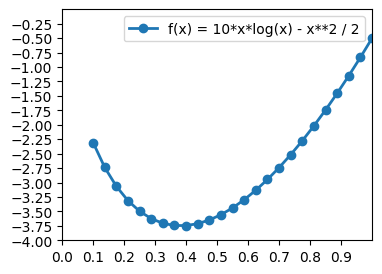

In [363]:
import matplotlib.pyplot as plt
import numpy as np


x_steps = np.linspace(left_bound, right_bound, 25)
y_values = list(map(lambdify(x, research_function), x_steps))

plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()

line = ax.plot(x_steps, y_values, '-o', linewidth=2.0)
line[0].set_label("f(x) = 10*x*log(x) - x**2 / 2")

ax.set(xlim=(0, 1), xticks=np.arange(0, 1, .1),
       ylim=(-4, 0), yticks=np.arange(-4, 0, .25))

ax.legend()

plt.show()

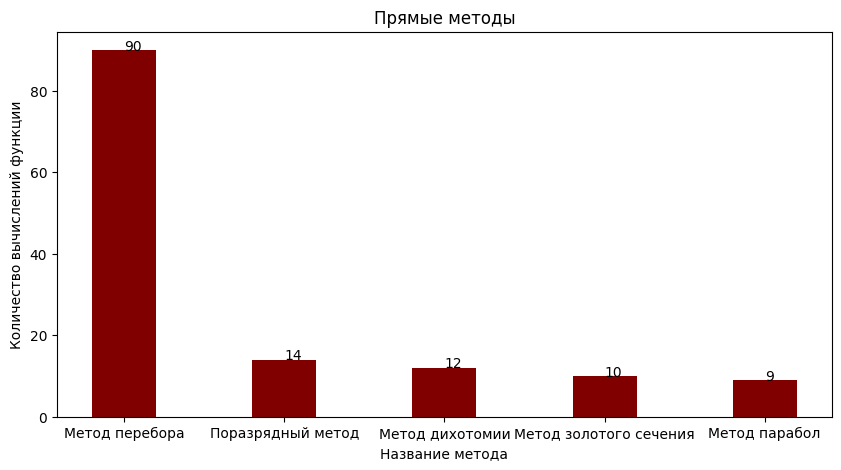

In [364]:
research_eps = 10e-3
 
# creating the dataset
data = {
    "Метод перебора": iterate_method(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Поразрядный метод": bitByBitSearch(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод дихотомии": dichotomy_minimize(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод золотого сечения": golden_section(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
    "Метод парабол": parabol_method(lambdify(x, research_function), left_bound, right_bound, research_eps)[2],
}
method_name = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(method_name, values, color ='maroon', 
        width = 0.4)

for i in range(len(method_name)):
        plt.text(i,values[i],values[i])

plt.xlabel("Название метода")
plt.ylabel("Количество вычислений функции")
plt.title("Прямые методы")
plt.show()


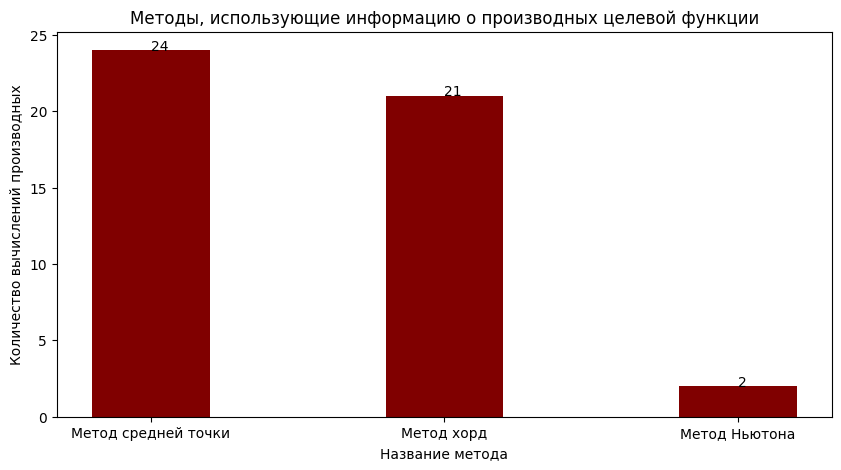

In [365]:
research_eps = 10e-7

# creating the dataset
data = {
    "Метод средней точки": middle_dot(research_function, left_bound, right_bound, research_eps)[2],
    "Метод хорд": chord_method(research_function, left_bound, right_bound, research_eps)[2],
    "Метод Ньютона": newton_method(research_function, left_bound, right_bound, research_eps)[2],
}
method_name = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(method_name, values, color ='maroon', 
        width = 0.4)

for i in range(len(method_name)):
        plt.text(i,values[i],values[i])

plt.xlabel("Название метода")
plt.ylabel("Количество вычислений производных")
plt.title('Методы, использующие информацию о производных целевой функции')
plt.show()

## Объяснение полученных результатов

### Прямые методы

Самым эффективным методом среди прямых метдов явялется метод парабол. Для вычисления минимума исследуемой функции с точность $eps = 10^{-3}$ методу понадобилось всего 9 вычисления значения функции. Это достигается за счет использования результатов из прошлых вычислений, использование аппроксимации параболой и благодаря тому, что он работает на гладкой функции.

### Методы, использующие информацию о производных целевой функции

Самым эффективным методом оказался метод Ньютона. Это происходит благодаря квадратичной сходимости, использованию второй производной (гессиане) и корректировке размера шага

# Задание 4

С помощью метода Ньютона, используя аналитические производные решить задачу минимизации функции
$$
f(x)=x*arctg(x)*x - \frac{1}{2}ln(1 + x^{2})
$$

для нескольких вариантов выбора начального приближения. Убедиться в том, что при выборе начального приближения не достаточно близко от точки минимума метод Ньютона может расходиться. Найти диапазон начальных приближений, при которых метод сходиться к точке минимума функции.

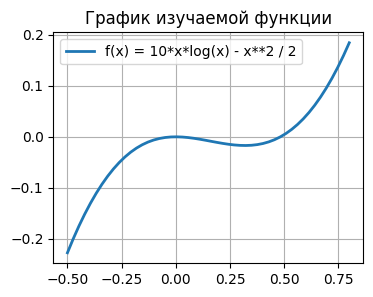

In [366]:
from sympy import atan, log

research_function = x * atan(x) * x - log(1 + x**2) / 2

x_steps = np.linspace(-0.5, .8, 50)
y_values = list(map(lambdify(x, research_function), x_steps))

plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()

line = ax.plot(x_steps, y_values, linewidth=2.0)
line[0].set_label("f(x) = 10*x*log(x) - x**2 / 2")

ax.legend()
plt.title("График изучаемой функции")
plt.grid()
plt.show()

Попробуем запустить метод Ньютона сначала с достаточно узким диапазоном поиска, а затем с диапозоном по-больше и посмотрим на результаты вычисления

In [367]:
def newton_method_research(func, x_mid, eps):
    """
    Реализация метода Ньютона. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    first_dx = func.diff('x')
    second_dx = first_dx.diff('x')

    func_dx = lambdify(x, first_dx)
    func_2dx = lambdify(x, second_dx)

    x_next = x_mid
    while True:
        x_next -= func_dx(x_next) / func_2dx(x_next)
        computes += 2

        if func_dx(x_next) <= eps:
            break

    return x_next, lambdify(x, func)(x_next), computes

In [368]:
result_1 = newton_method_research(research_function, 0.5, research_eps)
result_2 = newton_method_research(research_function, 0.1, research_eps)

text_to_print = f"""
При точности вычесления равном {research_eps} были достигунты такие результаты:
При \"х\" принадлежащим [0, 1]     --- x_min = {round(result_1[0], 5)} ; f(x_min) = {round(result_1[1], 5)}
При \"х\" принадлежащим [-1, 0.75] --- x_min = {round(result_2[0], 5)}    ; f(x_min) = {round(result_2[1], 5)}
"""
print(text_to_print)


При точности вычесления равном 1e-06 были достигунты такие результаты:
При "х" принадлежащим [0, 1]     --- x_min = 0.31917 ; f(x_min) = -0.01703
При "х" принадлежащим [-1, 0.75] --- x_min = -0.0    ; f(x_min) = -0.0



Из показательного вычисления выше можно сделать вывод, что при некорректном задании начальных точек метод Ньютона может разойтись и не найти точку минимума

In [369]:
def newton_rafson_method(func, x_mid, eps):
    """
    Реализация метода Ньютона-Рафсона. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    
    first_dx = func.diff('x')
    second_dx = first_dx.diff('x')

    func_dx = lambdify(x, first_dx)
    func_2dx = lambdify(x, second_dx)

    x_next = x_mid
    while True:
        x_mid = x_next - func_dx(x_next) / func_2dx(x_next)
        tau = (func_dx(x_next)**2) / (func_dx(x_next)**2 + func_dx(x_mid)**2)

        x_next -= tau * (func_dx(x_next) / func_2dx(x_next))
        computes += 7

        if func_dx(x_next) <= eps:
            break

    return x_next, lambdify(x, func)(x_next), computes

In [370]:
def markwarg_method(func, x_mid, eps):
    """
    Реализация метода Маркварга. Возвращает точку минимума, значение минимума функции и количество вычислений

    Необходимо, чтобы на вход подавалась функция, состоящая из объектов типа Symbol !!!
    """

    computes = 0
    nu = eps * 10
    
    first_dx = func.diff('x')
    second_dx = first_dx.diff('x')

    func_x = lambdify(x, func)
    func_dx = lambdify(x, first_dx)
    func_2dx = lambdify(x, second_dx)

    x_next = x_mid
    while True:
        f_prev = func_x(x_next)
        x_next -= func_dx(x_next) / (func_2dx(x_next) - nu)
        computes += 2

        f_next = func_x(x_next)

        if f_next < f_prev:
            nu /= 2
        else:
            nu *= 2

        if func_dx(x_next) <= eps:
            break

    return x_next, func_x(x_next), computes

Повторим исследование заданной функции, но теперь с методами Марквардта и Ньютона-Рафсона.

In [371]:
result_m_1 = markwarg_method(research_function, 0.5, research_eps)
result_m_2 = markwarg_method(research_function, .1, research_eps)
result_nr_1 = newton_rafson_method(research_function, 0.5, research_eps)
result_nr_2 = newton_rafson_method(research_function, .1 , research_eps)

text_to_print = f"""
При точности вычесления равном {research_eps} были достигунты такие результаты:

Марквардта \"х\" E [0, 1]          --- x_min = {round(result_m_1[0], 5)} ; f(x_min) = {round(result_m_1[1], 5)}
Марквардта \"х\" E [-1, 0.75]      --- x_min = {round(result_m_2[0], 5)} ; f(x_min) = {round(result_m_2[1], 5)}

Ньютона-Рафсона \"х\" E [0, 1]     --- x_min = {round(result_nr_1[0], 5)} ; f(x_min) = {round(result_nr_1[1], 5)}
Ньютона-Рафсона \"х\" E [-1, 0.75] --- x_min = {round(result_nr_2[0], 5)} ; f(x_min) = {round(result_nr_2[1], 5)}
"""
print(text_to_print)


При точности вычесления равном 1e-06 были достигунты такие результаты:

Марквардта "х" E [0, 1]          --- x_min = 0.31917 ; f(x_min) = -0.01703
Марквардта "х" E [-1, 0.75]      --- x_min = -0.0 ; f(x_min) = -0.0

Ньютона-Рафсона "х" E [0, 1]     --- x_min = 0.31917 ; f(x_min) = -0.01703
Ньютона-Рафсона "х" E [-1, 0.75] --- x_min = 0.0435 ; f(x_min) = -0.00086



# Задание 5

Составить программу нахождения глобального минимума многомодальных функций методом перебора и методом ломаных. Проверить ее работоспособность на примере следующих функций построить их графики:
$$
f(x)=\frac{cos(x)}{x^{2}} \to min, x \in [1; 12]
$$
$$
f(x)=\frac{1}{10}x + 2*sin(4x) \to min, x \in [0; 4]
$$

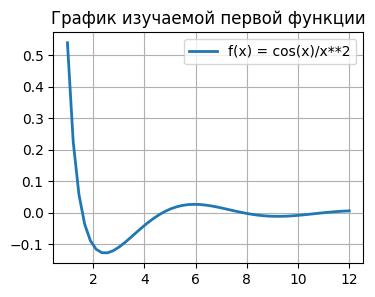

In [372]:
from sympy import cos

research_function_1 = cos(x)/x**2

x_steps = np.linspace(1, 12, 50)
y_values = list(map(lambdify(x, research_function_1), x_steps))

plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()

line = ax.plot(x_steps, y_values, linewidth=2.0)
line[0].set_label("f(x) = cos(x)/x**2")

ax.legend()
plt.title("График изучаемой первой функции")
plt.grid()
plt.show()

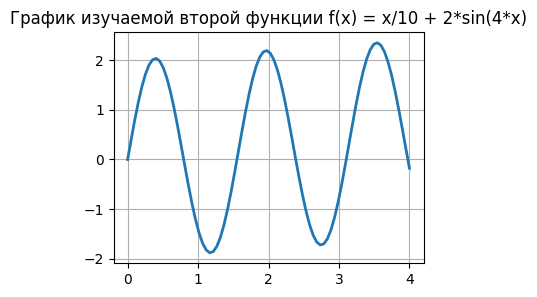

In [373]:
from sympy import sin

research_function_2 = x/10 + 2*sin(4*x)

x_steps = np.linspace(0, 4, 80)
y_values = list(map(lambdify(x, research_function_2), x_steps))

plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()

line = ax.plot(x_steps, y_values, linewidth=2.0) 

plt.title("График изучаемой второй функции f(x) = x/10 + 2*sin(4*x)")
plt.grid()
plt.show()

In [374]:
import numpy as np

# Пример многомодальной функции
def f(x):
    return np.sin(x) + 0.5 * np.sin(3 * x)

# Метод перебора
def brute_force_min(f, x_start, x_end, num_points=1000):
    x_values = np.linspace(x_start, x_end, num_points)
    y_values = f(x_values)
    
    # Нахождение индекса минимума
    min_index = np.argmin(y_values)
    
    return x_values[min_index], y_values[min_index]

In [375]:
def broken_lines_min(f, x_start, x_end, tol=1e-5, max_iter=100):
    x_left = x_start
    x_right = x_end
    
    iter_count = 0
    
    while (x_right - x_left) > tol and iter_count < max_iter:
        # Точки для вычисления ломаных
        x1 = x_left + (x_right - x_left) / 3
        x2 = x_right - (x_right - x_left) / 3
        
        # Вычисление значений функции в этих точках
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        # Сжатие интервала в зависимости от значений функции
        if f_x1 < f_x2:
            x_right = x2
        else:
            x_left = x1
        
        iter_count += 1
    
    # Возврат минимума как средней точки
    x_min = (x_left + x_right) / 2
    return x_min, f(x_min)

In [376]:
result_bf = brute_force_min(lambdify(x, research_function_1), 1, 12, research_eps)
result_bl = broken_lines_min(lambdify(x, research_function_1), 1, 12, research_eps)

text_to_print = f"""
При точности вычесления равном {research_eps} были достигунты такие результаты:

Метод перебора      --- x_min = {round(result_bf[0], 5)} ; f(x_min) = {round(result_bf[1], 5)} ; computes = {result_bf[2]}
Метод ломанных      --- x_min = {round(result_bl[0], 5)} ; f(x_min) = {round(result_bl[1], 5)} ; computes = {result_bl[2]}
"""
print(text_to_print)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
result_bf = brute_force_min(lambdify(x, research_function_2), 0, 4, research_eps)
result_bl = broken_lines_min(lambdify(x, research_function_2), 0, 4, research_eps)

text_to_print = f"""
При точности вычесления равном {research_eps} были достигунты такие результаты:

Метод перебора      --- x_min = {round(result_bf[0], 5)} ; f(x_min) = {round(result_bf[1], 5)} ; computes = {result_bf[2]}
Метод ломанных      --- x_min = {round(result_bl[0], 5)} ; f(x_min) = {round(result_bl[1], 5)} ; computes = {result_bl[2]}
"""
print(text_to_print)